In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
params_df = pd.read_excel("C:\\Users\\Nefeli\\Desktop\\opti2_stat_scripts\\ga_results\\ga_full.xlsx")

In [3]:
def excelListCleanup(inputDfRow):
    toClean = inputDfRow
    toRemove=['[',']','\n'] 
    for i in toRemove:
        toClean = toClean.replace(i,'')
    toClean = toClean.split(' ')
    toClean = [i for i in toClean if i!='']
    toClean = [float(i)for i in toClean]
    #print(toClean)
    return toClean
#params_df.iat[65, params_df.columns.get_loc('costVal_list')]
#print(excelListCleanup(params_df.iat[65, params_df.columns.get_loc('costVal_list')]))

In [4]:
params_df.costVal_list = params_df.costVal_list.apply(lambda x : excelListCleanup(x))
params_df.feasibility_list = params_df.feasibility_list.apply(lambda x : excelListCleanup(x))
params_df.lastHit_list = params_df.lastHit_list.apply(lambda x : excelListCleanup(x))

### Cost Values Boxplot 

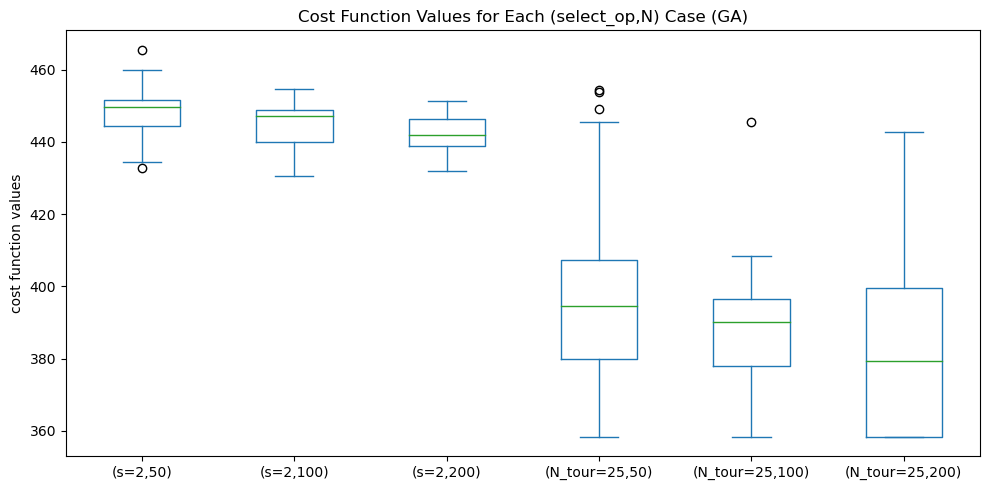

In [5]:
# Set the figure size
plt.rcParams["figure.figsize"] = [10, 5]
#plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

for f in range(1):
    #temp_df= params_df[(params_df['nb_r'] == nb_r[f])]
    data=[]
    titles=[]
    temp_df = params_df.copy()
    for i in range(6):
        data.append(temp_df.iat[i, temp_df.columns.get_loc('costVal_list')])
        #print(temp_df.iat[i, temp_df.columns.get_loc('costVal_list')])
        titles.append('select_op:'+str(temp_df.iat[i, temp_df.columns.get_loc('select_op')])+' N:'+str(temp_df.iat[i, temp_df.columns.get_loc('N')]))

    #print(temp_df)
    #print(data)
    # Pandas dataframe
    dataDf = pd.DataFrame({'(s=2,50)': data[0],'(s=2,100)': data[1],'(s=2,200)': data[2],'(N_tour=25,50)': data[3],'(N_tour=25,100)': data[4],'(N_tour=25,200)': data[5]})

    # Plot the dataframe
    ax = dataDf[['(s=2,50)','(s=2,100)','(s=2,200)','(N_tour=25,50)','(N_tour=25,100)','(N_tour=25,200)']].plot(kind='box', title='Cost Function Values for Each (select_op,N) Case (GA)')
    ax.set_ylabel('cost function values')
    # Name And Save the plot
    plt.savefig('C:\\Users\\Nefeli\\Desktop\\opti2_stat_scripts\\ga_results\\ga_boxplots\\'+'ga_cv_bxplt'+'.jpg', dpi=300, bbox_inches='tight',format='jpg')

### Feasibility Boxplot 

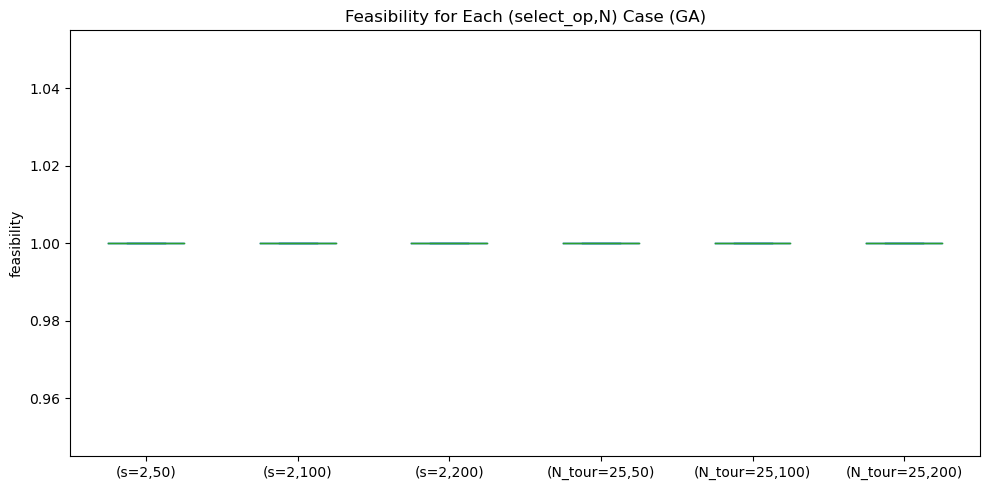

In [6]:
# Set the figure size
plt.rcParams["figure.figsize"] = [10, 5]
#plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

for f in range(1):
    #temp_df= params_df[(params_df['nb_r'] == nb_r[f])]
    data=[]
    titles=[]
    temp_df = params_df.copy()
    for i in range(6):
        data.append(temp_df.iat[i, temp_df.columns.get_loc('feasibility_list')])
        #print(temp_df.iat[i, temp_df.columns.get_loc('costVal_list')])
        titles.append('select_op:'+str(temp_df.iat[i, temp_df.columns.get_loc('select_op')])+' N:'+str(temp_df.iat[i, temp_df.columns.get_loc('N')]))

    #print(temp_df)
    #print(data)
    # Pandas dataframe
    dataDf = pd.DataFrame({'(s=2,50)': data[0],'(s=2,100)': data[1],'(s=2,200)': data[2],'(N_tour=25,50)': data[3],'(N_tour=25,100)': data[4],'(N_tour=25,200)': data[5]})

    # Plot the dataframe
    ax = dataDf[['(s=2,50)','(s=2,100)','(s=2,200)','(N_tour=25,50)','(N_tour=25,100)','(N_tour=25,200)']].plot(kind='box', title='Feasibility for Each (select_op,N) Case (GA)')
    ax.set_ylabel('feasibility')
    # Name And Save the plot
    plt.savefig('C:\\Users\\Nefeli\\Desktop\\opti2_stat_scripts\\ga_results\\ga_boxplots\\'+'ga_f_bxplt'+'.jpg', dpi=300, bbox_inches='tight',format='jpg')

### Last Hit Box Plot  

In [8]:
# Set the figure size
plt.rcParams["figure.figsize"] = [10, 5]
#plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

for f in range(1):
    #temp_df= params_df[(params_df['nb_r'] == nb_r[f])]
    data=[]
    titles=[]
    temp_df = params_df.copy()
    for i in range(6):
        data.append(temp_df.iat[i, temp_df.columns.get_loc('lastHit_list')])
        #print(temp_df.iat[i, temp_df.columns.get_loc('costVal_list')])
        titles.append('select_op:'+str(temp_df.iat[i, temp_df.columns.get_loc('select_op')])+' N:'+str(temp_df.iat[i, temp_df.columns.get_loc('N')]))

    #print(temp_df)
    #print(data)
    # Pandas dataframe
    dataDf = pd.DataFrame({'(s=2,50)': data[0],'(s=2,100)': data[1],'(s=2,200)': data[2],'(N_tour=25,50)': data[3],'(N_tour=25,100)': data[4],'(N_tour=25,200)': data[5]})

    # Plot the dataframe
    ax = dataDf[['(s=2,50)','(s=2,100)','(s=2,200)','(N_tour=25,50)','(N_tour=25,100)','(N_tour=25,200)']].plot(kind='box', title='Last Hit for Each (select_op,N) Case (GA)')
    ax.set_ylabel('last hit')
    # Name And Save the plot
    plt.savefig('C:\\Users\\Nefeli\\Desktop\\opti2_stat_scripts\\ga_results\\ga_boxplots\\'+'ga_lh_bxplt'+'.jpg', dpi=300, bbox_inches='tight',format='jpg')